In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as sk

import warnings; warnings.simplefilter('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import sklearn as sk
import mglearn
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv("Energi_Viborg_Dandas_data.csv")

In [48]:
data

,ID,mslink,XKoordinat,YKoordinat,LedningID,Dobbeltled,EjerKompon,fra_kote,til_kote,Laengde,...,anlag_aar,TransportK,SystemKode,Funktionsk,KategoriAf,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri,DatoUdf
0,87527,87527,526809.08,6250849.80,87527,1.0,1.0,4.500000,3.539986,2.55,...,1996.0,1,1,0,1.0,0.0,2010,2014,NaN,1996.0
1,87528,87528,526794.78,6250869.11,87528,1.0,1.0,4.930000,4.500000,24.03,...,1996.0,1,1,0,1.0,0.0,2010,2014,NaN,1996.0
2,87530,87530,526772.22,6250871.70,87530,1.0,1.0,5.180000,4.930000,22.71,...,1996.0,1,1,0,1.0,0.0,2010,2014,NaN,1996.0
3,87531,87531,526761.65,6250892.87,87531,1.0,1.0,6.247029,5.180000,23.67,...,1996.0,1,1,0,1.0,0.0,2010,2014,NaN,1996.0
4,87539,87539,526729.74,6250869.41,87539,1.0,1.0,5.530000,6.344251,39.61,...,1996.0,1,1,0,1.0,0.0,2010,2014,NaN,1996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24138,223238,223238,540611.81,6249084.37,223053,1.0,1.0,20.140000,19.550000,48.71,...,2018.0,1,1,0,1.0,0.0,2018,2018,NaN,2018.0
24139,223239,223239,540612.39,6249083.67,223054,1.0,1.0,19.710000,19.120000,46.98,...,2018.0,1,0,0,1.0,0.0,2018,2018,NaN,2018.0
24140,223240,223240,540733.23,6249089.23,223055,1.0,1.0,21.720000,20.140000,121.52,...,2018.0,1,1,0,1.0,0.0,2018,2018,NaN,2018.0
24141,223241,223241,540732.62,6249088.25,223056,1.0,1.0,21.280000,19.710000,120.32,...,2018.0,1,0,0,1.0,0.0,2018,2018,NaN,2018.0


In [88]:
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
import base64
from IPython.core.display import display, HTML
gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'data', 'table': data}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")
HTML_TEMPLATE = """
 <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcompone
nts-lite.js"></script>
 <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/fa
cets-dist/facets-jupyter.html" >
 <facets-overview id="all_data"></facets-overview>
 <script>
 document.querySelector("#all_data").protoInput = "{protostr}";
 </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [50]:
#drop columns not needed after asking the company about the meaning of these features
columns_to_be_removed = ['ID', 'mslink', 'XKoordinat','YKoordinat','LedningID','Dobbeltled','EjerKompon','SystemKode','KategoriAf','DatoUdf']
data=data.drop(columns_to_be_removed,axis='columns')
data[0:-1]


,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri
0,4.500000,3.539986,2.55,376.475989,225.0,4.0,1996.0,1,0,0.0,2010,2014,NaN
1,4.930000,4.500000,24.03,17.894299,225.0,4.0,1996.0,1,0,0.0,2010,2014,NaN
2,5.180000,4.930000,22.71,11.008366,225.0,4.0,1996.0,1,0,0.0,2010,2014,NaN
3,6.247029,5.180000,23.67,45.079400,225.0,4.0,1996.0,1,0,0.0,2010,2014,NaN
4,5.530000,6.344251,39.61,-20.556713,150.0,4.0,1996.0,1,0,0.0,2010,2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24137,21.080000,19.130000,51.54,37.834692,160.0,4.0,2018.0,1,0,0.0,2018,2018,NaN
24138,20.140000,19.550000,48.71,12.112503,250.0,4.0,2018.0,1,0,0.0,2018,2018,NaN
24139,19.710000,19.120000,46.98,12.558536,160.0,4.0,2018.0,1,0,0.0,2018,2018,NaN
24140,21.720000,20.140000,121.52,13.001975,200.0,4.0,2018.0,1,0,0.0,2018,2018,NaN


In [51]:
# in the column DatoSaneri is the date of repairing and if there is no date it means it is not repaired
data['DatoSaneri'].fillna(0, inplace=True)
data

,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri
0,4.500000,3.539986,2.55,376.475989,225.0,4.0,1996.0,1,0,0.0,2010,2014,0.0
1,4.930000,4.500000,24.03,17.894299,225.0,4.0,1996.0,1,0,0.0,2010,2014,0.0
2,5.180000,4.930000,22.71,11.008366,225.0,4.0,1996.0,1,0,0.0,2010,2014,0.0
3,6.247029,5.180000,23.67,45.079400,225.0,4.0,1996.0,1,0,0.0,2010,2014,0.0
4,5.530000,6.344251,39.61,-20.556713,150.0,4.0,1996.0,1,0,0.0,2010,2014,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24138,20.140000,19.550000,48.71,12.112503,250.0,4.0,2018.0,1,0,0.0,2018,2018,0.0
24139,19.710000,19.120000,46.98,12.558536,160.0,4.0,2018.0,1,0,0.0,2018,2018,0.0
24140,21.720000,20.140000,121.52,13.001975,200.0,4.0,2018.0,1,0,0.0,2018,2018,0.0
24141,21.280000,19.710000,120.32,13.048537,160.0,4.0,2018.0,1,0,0.0,2018,2018,0.0


In [52]:
print("Number of rows before removing NaNs: {}".format(data.shape[0]))

Number of rows before removing NaNs: 24143


In [53]:
# to check if some value of the features are empty
data = data.dropna()
print("Number of rows after removing NaNs: {}".format(data.shape[0]))

Number of rows after removing NaNs: 24143


In [54]:
# take only the pipes that are broken(by TV insection) now and the repaired ones


data_with_TVObsAndSaneri = data[data['TVObsKode'].isin([1]) | data['DatoSaneri'] > 0]
data_with_TVObsAndSaneri

,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri
36,34.720000,33.480000,64.88,19.112207,300.0,1.0,1939.0,1,0,0.0,2010,2014,1997.0
42,39.460000,39.160000,91.75,3.269755,400.0,1.0,1939.0,1,0,1.0,2010,2014,0.0
43,39.710000,39.480000,87.69,2.622876,300.0,1.0,1939.0,1,0,1.0,2010,2014,0.0
64,40.550000,40.080000,52.11,9.019382,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0
65,40.380000,40.550000,68.39,-2.485744,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23957,11.940000,10.550000,60.32,23.043767,350.0,1.0,1968.0,1,0,1.0,2018,2018,0.0
24062,25.720000,22.820000,44.37,65.359477,160.0,4.0,2017.0,1,0,1.0,2018,2018,0.0
24073,28.490000,27.730000,84.29,9.016491,200.0,1.0,1995.0,1,0,1.0,2018,2018,0.0
24090,27.162706,27.902884,18.82,-39.329328,315.0,4.0,1965.0,1,0,1.0,2018,2018,0.0


In [55]:
print("Number of rows broken now and repaired ones: {}".format(data_with_TVObsAndSaneri.shape[0]))

Number of rows broken now and repaired ones: 2077


In [56]:
#get around 2077 rows with not broken pipes

data_not_broken = data[~data['TVObsKode'].isin([0]) | data['DatoSaneri'] == 0]
data_not_broken = data_not_broken.sample(n=2077) 
data_not_broken

,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri
16775,62.95,62.93,9.12,2.192982,700.0,1.0,1974.0,1,0,0.0,2012,2014,0.0
4768,20.91,20.69,47.67,4.615062,190.0,4.0,2000.0,1,0,0.0,2010,2014,0.0
5814,41.58,40.91,65.08,10.295022,200.0,1.0,1975.0,1,0,0.0,2010,2014,0.0
6413,39.31,34.89,60.55,72.997523,200.0,1.0,1955.0,1,0,0.0,2010,2014,0.0
19794,77.78,77.26,36.48,14.254386,160.0,4.0,2000.0,1,0,0.0,2015,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,16.93,16.84,23.89,3.767267,600.0,1.0,1979.0,1,0,0.0,2017,2018,0.0
10830,15.35,14.90,45.46,9.898812,200.0,1.0,1968.0,1,0,0.0,2010,2014,0.0
17063,63.65,63.34,52.25,5.933014,300.0,1.0,1962.0,1,0,0.0,2012,2014,0.0
21063,36.37,36.11,36.65,7.094134,160.0,4.0,1954.0,1,0,0.0,2016,2016,0.0


In [57]:
frames = [data_with_TVObsAndSaneri, data_not_broken]
  
data_final = pd.concat(frames)
data_final

,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri
36,34.72,33.48,64.88,19.112207,300.0,1.0,1939.0,1,0,0.0,2010,2014,1997.0
42,39.46,39.16,91.75,3.269755,400.0,1.0,1939.0,1,0,1.0,2010,2014,0.0
43,39.71,39.48,87.69,2.622876,300.0,1.0,1939.0,1,0,1.0,2010,2014,0.0
64,40.55,40.08,52.11,9.019382,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0
65,40.38,40.55,68.39,-2.485744,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,16.93,16.84,23.89,3.767267,600.0,1.0,1979.0,1,0,0.0,2017,2018,0.0
10830,15.35,14.90,45.46,9.898812,200.0,1.0,1968.0,1,0,0.0,2010,2014,0.0
17063,63.65,63.34,52.25,5.933014,300.0,1.0,1962.0,1,0,0.0,2012,2014,0.0
21063,36.37,36.11,36.65,7.094134,160.0,4.0,1954.0,1,0,0.0,2016,2016,0.0


In [85]:
data = data_final
dt = data[data['DatoSaneri']> 0]
dt

,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri
36,34.72,33.48,64.88,19.112207,300.0,1.0,1939.0,1,0,0.0,2010,2014,1997.0
118,54.47,54.40,4.90,14.285714,160.0,4.0,2011.0,1,0,0.0,2013,2014,2012.0
297,49.79,49.39,14.68,27.247956,191.0,4.0,1975.0,1,0,0.0,2010,2014,2016.0
298,49.79,49.39,14.68,27.247956,191.0,4.0,1975.0,1,0,0.0,2016,2016,2016.0
299,50.36,49.81,47.33,11.620537,191.0,1.0,1975.0,1,0,0.0,2010,2014,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23696,29.38,26.74,84.72,31.161473,335.0,1.0,1920.0,1,0,0.0,2018,2018,2018.0
23722,19.35,12.99,219.36,28.993435,450.0,4.0,1980.0,1,0,0.0,2018,2018,2004.0
23723,26.32,19.35,225.27,30.940649,400.0,4.0,1980.0,1,0,0.0,2018,2018,2004.0
23910,29.79,29.28,22.93,22.241605,200.0,1.0,1937.0,1,0,0.0,2018,2018,2010.0


# Finding Outliers and removing Them

<AxesSubplot:>

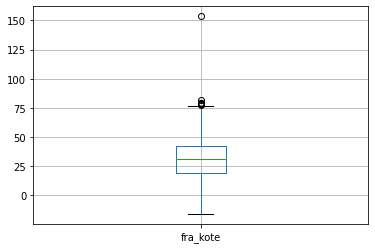

In [59]:
# first feature 'fra_kote' from eleven features

data.boxplot('fra_kote')

In [60]:
Q1 = data['fra_kote'].quantile(0.25)
Q3 = data['fra_kote'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

print("Number of rows before applying filter: {}".format(data.shape[0]))

data = data[data["fra_kote"] >= Q1-1.5*IQR]
data = data[data["fra_kote"] <= Q3+1.5*IQR]
print("Number of rows after applying filter: {}".format(data.shape[0]))

Number of rows before applying filter: 4154
Number of rows after applying filter: 4146


<AxesSubplot:>

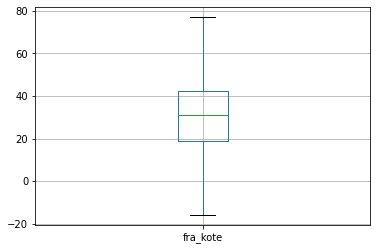

In [61]:
data.boxplot('fra_kote')

<AxesSubplot:>

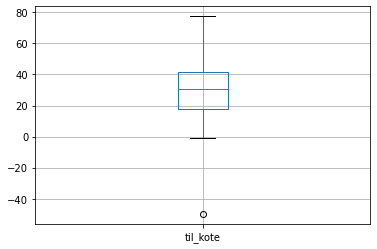

In [62]:
# second feature 
data.boxplot('til_kote')

In [63]:
Q1 = data['til_kote'].quantile(0.25)
Q3 = data['til_kote'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

print("Number of rows before applying filter: {}".format(data.shape[0]))

data = data[data["til_kote"] >= Q1-1.5*IQR]
data = data[data["til_kote"] <= Q3+1.5*IQR]
print("Number of rows after applying filter: {}".format(data.shape[0]))

Number of rows before applying filter: 4146
Number of rows after applying filter: 4145


<AxesSubplot:>

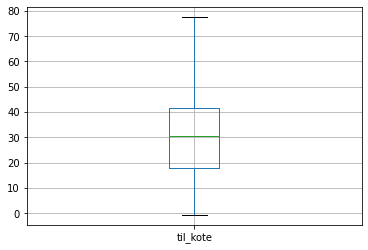

In [64]:
data.boxplot('til_kote')

<AxesSubplot:>

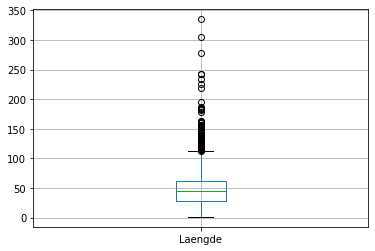

In [65]:
# Third feature 
data.boxplot('Laengde')

In [66]:
Q1 = data['Laengde'].quantile(0.25)
Q3 = data['Laengde'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

print("Number of rows before applying filter: {}".format(data.shape[0]))

data = data[data["Laengde"] >= Q1-1.5*IQR]
data = data[data["Laengde"] <= Q3+1.5*IQR]
print("Number of rows after applying filter: {}".format(data.shape[0]))

Number of rows before applying filter: 4145
Number of rows after applying filter: 4069


<AxesSubplot:>

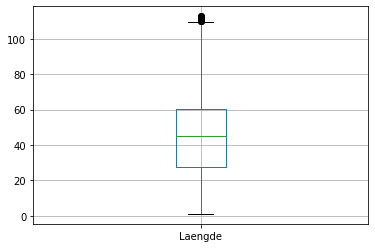

In [67]:
data.boxplot('Laengde')

<AxesSubplot:>

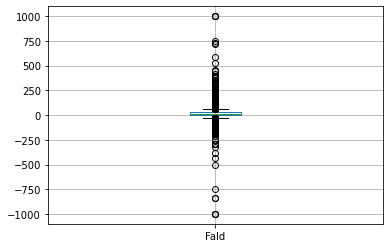

In [68]:
# Fourth feature 'Fald'
data.boxplot('Fald')

In [69]:
Q1 = data['Fald'].quantile(0.25)
Q3 = data['Fald'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

print("Number of rows before applying filter: {}".format(data.shape[0]))

data = data[data["Fald"] >= Q1-1.5*IQR]
data = data[data["Fald"] <= Q3+1.5*IQR]
print("Number of rows after applying filter: {}".format(data.shape[0]))

Number of rows before applying filter: 4069
Number of rows after applying filter: 3640


<AxesSubplot:>

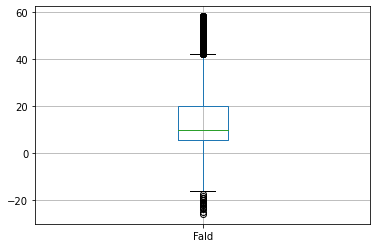

In [70]:
data.boxplot('Fald')

<AxesSubplot:>

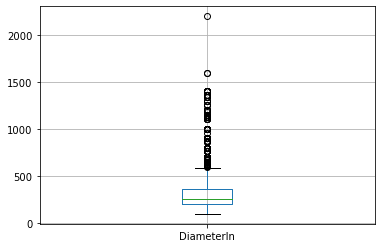

In [71]:
# Fifth feature 'DiameterIn'
data.boxplot('DiameterIn')

In [72]:
Q1 = data['DiameterIn'].quantile(0.25)
Q3 = data['DiameterIn'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

print("Number of rows before applying filter: {}".format(data.shape[0]))

data = data[data["DiameterIn"] >= Q1-1.5*IQR]
data = data[data["DiameterIn"] <= Q3+1.5*IQR]
print("Number of rows after applying filter: {}".format(data.shape[0]))

Number of rows before applying filter: 3640
Number of rows after applying filter: 3279


<AxesSubplot:>

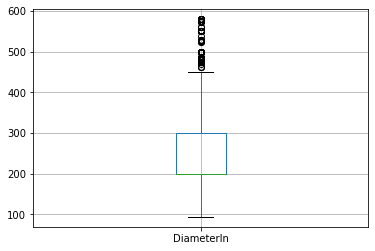

In [73]:
data.boxplot('DiameterIn')

<AxesSubplot:>

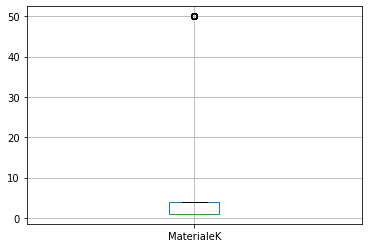

In [74]:
# Sixth feature 'MaterialeK	'
data.boxplot('MaterialeK')

In [75]:
Q1 = data['MaterialeK'].quantile(0.25)
Q3 = data['MaterialeK'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

print("Number of rows before applying filter: {}".format(data.shape[0]))

data = data[data["MaterialeK"] >= Q1-1.5*IQR]
data = data[data["MaterialeK"] <= Q3+1.5*IQR]
print("Number of rows after applying filter: {}".format(data.shape[0]))

Number of rows before applying filter: 3279
Number of rows after applying filter: 3235


<AxesSubplot:>

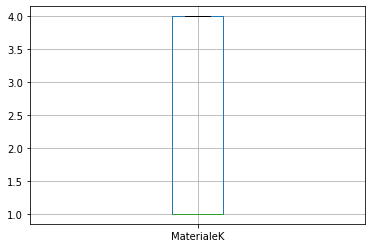

In [76]:
data.boxplot('MaterialeK')

<AxesSubplot:>

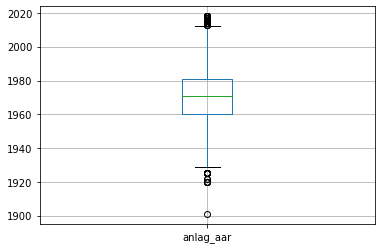

In [77]:
# Seventh feature 'anlag_aar'
data.boxplot('anlag_aar')

In [78]:
Q1 = data['anlag_aar'].quantile(0.25)
Q3 = data['anlag_aar'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

print("Number of rows before applying filter: {}".format(data.shape[0]))

data = data[data["anlag_aar"] >= Q1-1.5*IQR]
data = data[data["anlag_aar"] <= Q3+1.5*IQR]
print("Number of rows after applying filter: {}".format(data.shape[0]))

Number of rows before applying filter: 3235
Number of rows after applying filter: 3127


<AxesSubplot:>

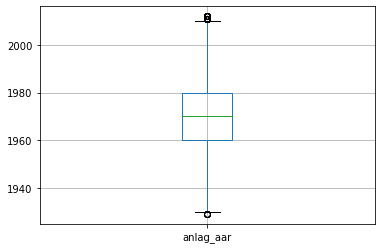

In [79]:
data.boxplot('anlag_aar')

<AxesSubplot:>

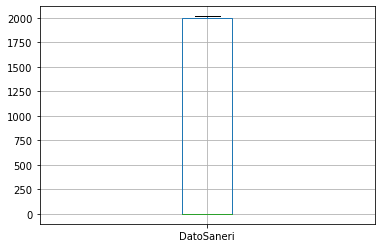

In [80]:
# Eighth feature 'DatoSaneri'
data.boxplot('DatoSaneri')

In [87]:
data

,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri
36,34.72,33.48,64.88,19.112207,300.0,1.0,1939.0,1,0,0.0,2010,2014,1997.0
42,39.46,39.16,91.75,3.269755,400.0,1.0,1939.0,1,0,1.0,2010,2014,0.0
43,39.71,39.48,87.69,2.622876,300.0,1.0,1939.0,1,0,1.0,2010,2014,0.0
64,40.55,40.08,52.11,9.019382,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0
65,40.38,40.55,68.39,-2.485744,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,16.93,16.84,23.89,3.767267,600.0,1.0,1979.0,1,0,0.0,2017,2018,0.0
10830,15.35,14.90,45.46,9.898812,200.0,1.0,1968.0,1,0,0.0,2010,2014,0.0
17063,63.65,63.34,52.25,5.933014,300.0,1.0,1962.0,1,0,0.0,2012,2014,0.0
21063,36.37,36.11,36.65,7.094134,160.0,4.0,1954.0,1,0,0.0,2016,2016,0.0


In [ ]:
#df.hist(bins=50,figsize=(16,12))
for j in data_final:
 fig, ax = plt.subplots(figsize=(12,6))
 sns.distplot(dfy[j], ax=ax)
for i in houses.feature_names:
 fig, ax = plt.subplots(figsize=(12,6))
 sns.distplot(dfx[i], ax=ax